# mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries

import argparse as args
from argparse import ArgumentParser
import cv2
from google.colab.patches import cv2_imshow
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image

memanggil gambar

Text(0.5, 1.0, 'convert to RGB')

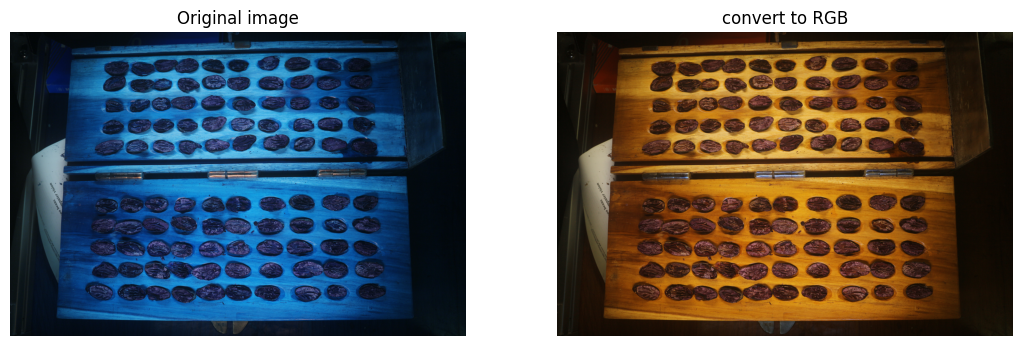

In [3]:
img = cv2.imread("/content/drive/MyDrive/Latihan CNN/Cropping Gambar/Gambar 1.JPG")

img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Matplot lib expects img in RGB format but OpenCV provides it in BGR.

# create figure
fig = plt.figure(figsize=(20, 10))
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

plt.imshow(img,'gray')
plt.axis('off')
plt.title("Original image")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_RGB,'gray')
plt.axis('off')
plt.title("convert to RGB")

# Cropping Image

## Make a mask

Memanggil Gambar

Text(0.5, 1.0, 'Original image')

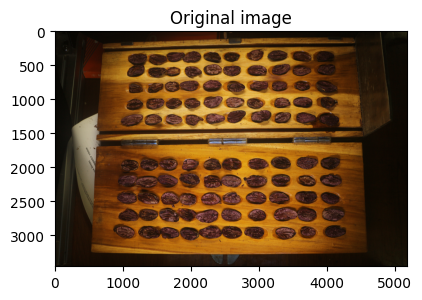

In [4]:
# make a contrast image
img = cv2.imread("/content/drive/MyDrive/Latihan CNN/Cropping Gambar/Gambar 1.JPG")

img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

plt.imshow(img_RGB,'gray')
plt.axis('on')
plt.title("Original image")

Text(0.5, 1.0, 'Original Resized')

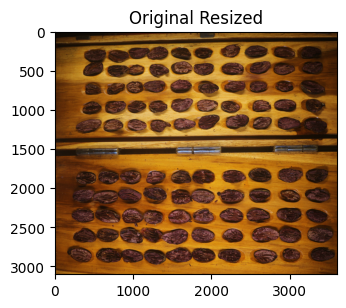

In [5]:
# resizing image
resize_Original = img_RGB[100:3200,700:4300]

# create figure
fig = plt.figure(figsize=(8, 4))
rows = 1
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

plt.imshow(img_RGB,'gray')
plt.axis('on')
plt.imshow(resize_Original,'gray')
plt.title("Original Resized")

Text(0.5, 1.0, 'gray image')

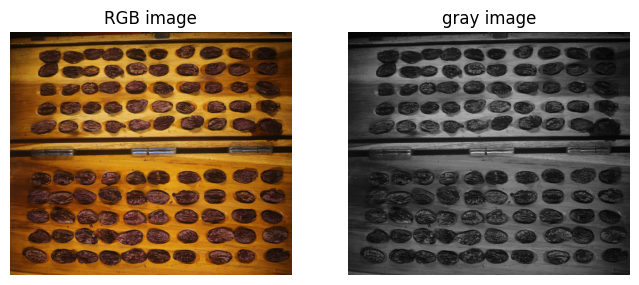

In [6]:
# make a gray image
img_gray = cv2.cvtColor(resize_Original, cv2.COLOR_BGR2GRAY)

# create figure
fig = plt.figure(figsize=(8, 4))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(resize_Original,'gray')
plt.axis('off')
plt.title("RGB image")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_gray,'gray')
plt.axis('off')
plt.title("gray image")

Binarization with otsu-thresholding

Text(0.5, 1.0, 'Inverse Threshold')

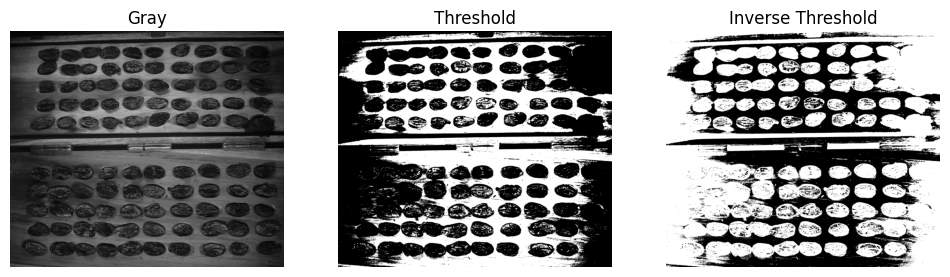

In [7]:
# make binarization image with otsu-thresholding
th_val, img_th = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# invert
img_th_inv = cv2.bitwise_not(img_th)

# create figure
fig = plt.figure(figsize=(12, 6))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(img_gray,'gray')
plt.axis('off')
plt.title("Gray")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_th,'gray')
plt.axis('off')
plt.title("Threshold")

fig.add_subplot(rows, columns, 3)
plt.imshow(img_th_inv,'gray')
plt.axis('off')
plt.title("Inverse Threshold")

Text(0.5, 1.0, 'bordered image')

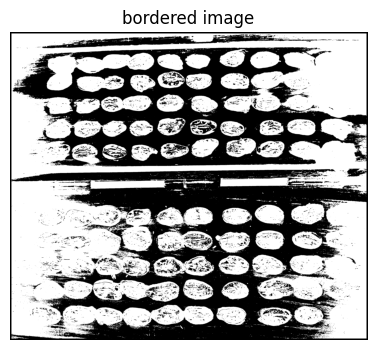

In [8]:
# membuat border/garis tepi citra agar next proses cleaning nya berhasil
image_bordered = cv2.copyMakeBorder(src=img_th_inv, top=15, bottom=15, left=15, right=15, borderType=cv2.BORDER_CONSTANT)

fig = plt.figure(figsize=(7, 4))
plt.imshow (image_bordered, 'gray')
plt.axis('off')
plt.title("bordered image")

Cleaning

Text(0.5, 1.0, 'Output')

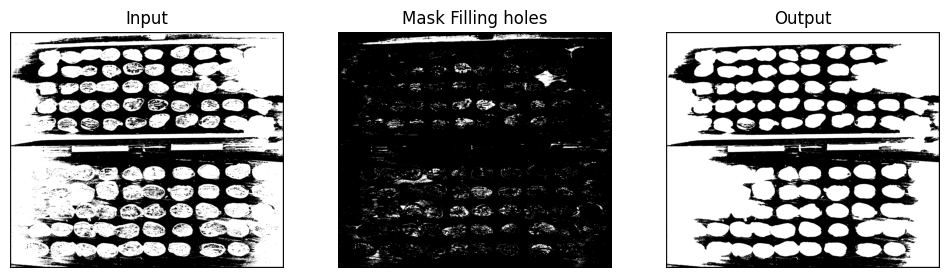

In [9]:
# Cleaning citra
im_floodfill = image_bordered.copy()
h, w = image_bordered.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = image_bordered | im_floodfill_inv

# create figure
fig = plt.figure(figsize=(12, 6))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(image_bordered,'gray')
plt.axis('off')
plt.title("Input")

fig.add_subplot(rows, columns, 2)
plt.imshow(im_floodfill_inv,'gray')
plt.axis('off')
plt.title("Mask Filling holes")

fig.add_subplot(rows, columns, 3)
plt.imshow(im_out,'gray')
plt.axis('off')
plt.title("Output")

Morphological erosion & dilation operation

Text(0.5, 1.0, 'Dilation (Kernel Dimensi 3 x 3)')

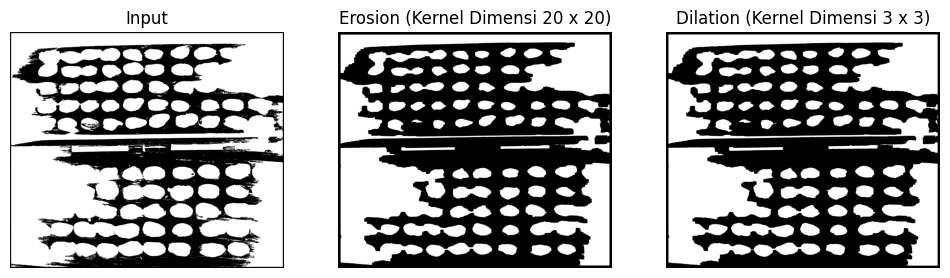

In [12]:
# Operasi morfologi erosi dan dilasi
kernel1 = np.ones((20,20), np.uint8)
# kernel2 = np.ones((20,20), np.uint8)
kernel2 = np.ones((3,3), np.uint8)

img_erosion0 = cv2.erode(im_out, kernel1, iterations=2)
img_dilation0 = cv2.dilate(img_erosion0, kernel2, iterations=2)

# create figure
fig = plt.figure(figsize=(12, 6))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(im_out,'gray')
plt.axis('off')
plt.title("Input")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_erosion0,'gray')
plt.axis('off')
plt.title("Erosion (Kernel Dimensi 20 x 20)")

fig.add_subplot(rows, columns, 3)
plt.imshow(img_dilation0,'gray')
plt.axis('off')
plt.title("Dilation (Kernel Dimensi 3 x 3)")

(3100, 3600, 3)
(3130, 3630)
(3100, 3600)


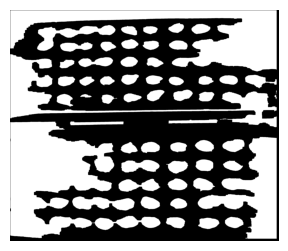

In [13]:
# Citra di resize kembali

# ukuran gambar sebelum diborder: img_resize_crop_ori = result_CLAHE[100:3200,700:4300]
# ukuran border sebesar +15 pixel dari ukuran gambar: image_bordered = cv2.copyMakeBorder(src=img_th_inv, top=15, bottom=15, left=15, right=15, borderType=cv2.BORDER_CONSTANT)

img_resize_2 = img_dilation0[30:3215,30:4315]

fig = plt.figure(figsize=(7, 3))
plt.axis('off')
plt.imshow(img_resize_2,'gray')

print(resize_Original.shape) # print ukuran gambar yang di resize ke-1
print(image_bordered.shape) # print ukuran gambar yang sudah diborder
print(img_resize_2.shape) # print ukuran gambar hasil resize ke-2 pada coding ini

Remove undesirable element

Text(0.5, 1.0, 'Output')

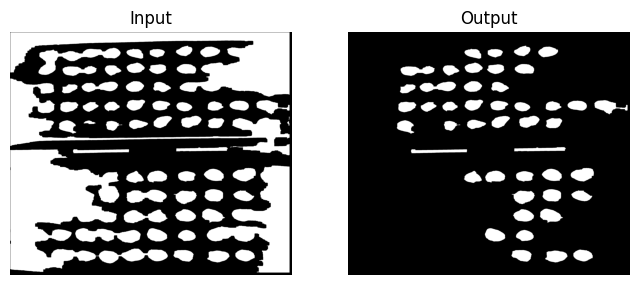

In [19]:
# Remove undesirable element
img_resize_2 = img_resize_2.astype('uint8')
analysis = cv2.connectedComponentsWithStats(img_resize_2,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

# Initialize a new image to
# store all the output components
output_kakao = np.zeros(img_gray.shape, dtype="uint8")
#Loop through each component
for i in range(1, totalLabels):
    sizes = values[i, cv2.CC_STAT_AREA]
    if (sizes > 15000) and (sizes < 50000): # atur size element yang mau di keep
    #if (sizes > 15000) and (sizes < 40000):
        componentMask = (label_ids == i).astype("uint8") * 255
        output_kakao = cv2.bitwise_or(output_kakao, componentMask)

# create figure
fig = plt.figure(figsize=(8, 4))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img_resize_2,'gray')
plt.axis('off')
plt.title("Input")

fig.add_subplot(rows, columns, 2)
plt.imshow(output_kakao,'gray')
plt.axis('off')
plt.title("Output")

## Masking the image

Object detection

In [ ]:
# mengatur path untuk lokasi output hasil cropping
path = r"/content/drive/MyDrive/Latihan CNN/Cropping Gambar/Gambar 2"
os.chdir(path)

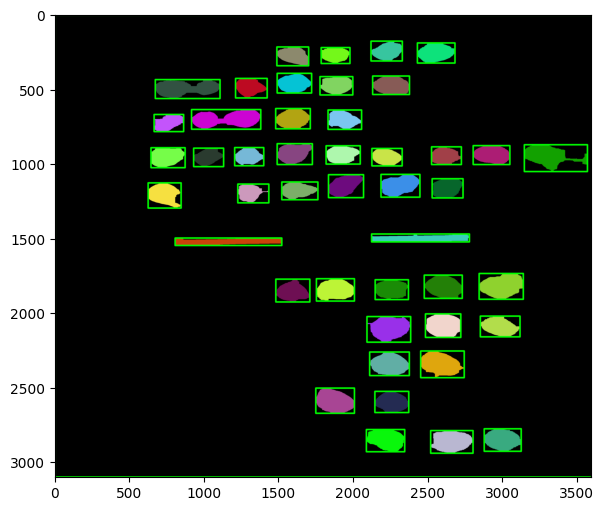

In [20]:
# membentuk kontur objek
original = resize_Original.copy()
connectivity = 8
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(output_kakao, connectivity, cv2.CV_32S)
sizes = stats[1:, -1]; nb_components = nb_components - 1
min_size = 250 #threshhold value for objects in scene
img_box = np.zeros((resize_Original.shape), np.uint8)
CROP_number = 0
for i in range(0, nb_components+1):
       color = np.random.randint(255,size=3)
       # draw the bounding rectangele around each object
       cv2.rectangle(img_box, (stats[i][0],stats[i][1]),(stats[i][0]+stats[i][2],stats[i][1]+stats[i][3]), (0,255,0), 10)
       img_box[output == i + 1] = color
       CROP = original[(stats[i][1]-45):(stats[i][1]+stats[i][3]+45), (stats[i][0]-45):(stats[i][0]+stats[i][2]+45)] # Ukuran box

       # save hasil cropping citra ke path yang telah diatur
       #cv2.imwrite('CROP Gambar 2_{}.JPG'.format(CROP_number), CROP)
       CROP_number += 1

# create figure
fig = plt.figure(figsize=(10, 6))
plt.imshow(img_box)

Text(0.5, 1.0, 'Output')

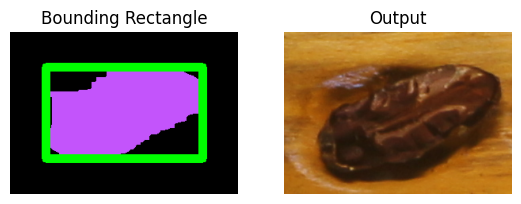

In [22]:
# Melihat hasil cropping
i=13 # objek iterasi 13
bounding_rectangle = img_box[(stats[i][1]-45):(stats[i][1]+stats[i][3]+45), (stats[i][0]-45):(stats[i][0]+stats[i][2]+45)]
cropped2 = resize_Original[(stats[i][1]-45):(stats[i][1]+stats[i][3]+45), (stats[i][0]-45):(stats[i][0]+stats[i][2]+45)]
cropped2RGB = cv2.cvtColor(cropped2, cv2.COLOR_BGR2RGB)

# create figure
fig = plt.figure(figsize=(10, 5))

# setting values to rows and column variables
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(bounding_rectangle,'gray')
plt.axis('off')
plt.title("Bounding Rectangle")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
plt.imshow(cropped2,'gray')
plt.axis('off')
plt.title("Output")

Running untuk 1 gambar

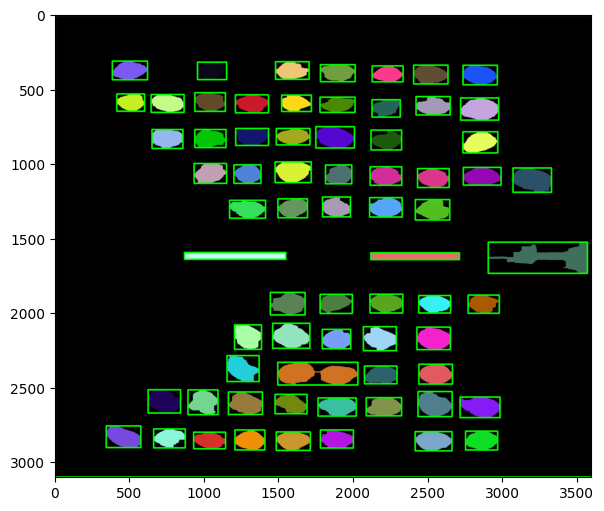

In [24]:
# mengatur path untuk lokasi output hasil cropping
path = r"/content/drive/MyDrive/Latihan CNN/Cropping Gambar/Gambar 2"
os.chdir(path)

# memanggil gambar
img = cv2.imread("/content/drive/MyDrive/Latihan CNN/Cropping Gambar/Gambar 2.JPG")

# resizing image
resize_Original = img[100:3200,700:4300]

# make a gray image
img_gray = cv2.cvtColor(resize_Original, cv2.COLOR_BGR2GRAY)

# make binarization image with otsu-thresholding
th_val, img_th = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_th_inv = cv2.bitwise_not(img_th) # invert

# membuat border/garis tepi citra agar next proses cleaning nya berhasil
image_bordered = cv2.copyMakeBorder(src=img_th_inv, top=15, bottom=15, left=15, right=15, borderType=cv2.BORDER_CONSTANT)

# Cleaning citra
im_floodfill = image_bordered.copy()
h, w = image_bordered.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = image_bordered | im_floodfill_inv

# Operasi morfologi erosi dan dilasi
kernel1 = np.ones((20,20), np.uint8)
kernel2 = np.ones((3,3), np.uint8)
img_erosion0 = cv2.erode(im_out, kernel1, iterations=2)
img_dilation0 = cv2.dilate(img_erosion0, kernel2, iterations=2)

# resize
img_resize_2 = img_dilation0[30:3215,30:4315]

# Remove undesirable element
img_resize_2 = img_resize_2.astype('uint8')
analysis = cv2.connectedComponentsWithStats(img_resize_2,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

# Remove undesirable element
img_resize_2 = img_resize_2.astype('uint8')
analysis = cv2.connectedComponentsWithStats(img_resize_2,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
output_kakao = np.zeros(img_gray.shape, dtype="uint8")
#Loop through each component
for i in range(1, totalLabels):
    sizes = values[i, cv2.CC_STAT_AREA]
    if (sizes > 15000) and (sizes < 60000):
        componentMask = (label_ids == i).astype("uint8") * 255
        output_kakao = cv2.bitwise_or(output_kakao, componentMask)

# membentuk kontur objek biji kakao dengan bounding rectangle
original = resize_Original.copy()
connectivity = 8
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(output_kakao, connectivity, cv2.CV_32S)
sizes = stats[1:, -1]; nb_components = nb_components - 1
min_size = 250 #threshhold value for objects in scene
img_box = np.zeros((resize_Original.shape), np.uint8)
CROP_number = 0
for i in range(0, nb_components+1):
       color = np.random.randint(255,size=3)
       cv2.rectangle(img_box, (stats[i][0],stats[i][1]),(stats[i][0]+stats[i][2],stats[i][1]+stats[i][3]), (0,255,0), 10)
       img_box[output == i + 1] = color
       CROP = original[(stats[i][1]-45):(stats[i][1]+stats[i][3]+45), (stats[i][0]-45):(stats[i][0]+stats[i][2]+45)] # Ukuran box
       # save hasil cropping citra ke path yang telah diatur
       cv2.imwrite('CROP Gambar 2_{}.JPG'.format(CROP_number), CROP)
       CROP_number += 1

# create figure
fig = plt.figure(figsize=(10, 6))
plt.imshow(img_box)

# Segmentasi Citra

### Otsu-Thresholding

Make a mask

Text(0.5, 1.0, 'Blurred')

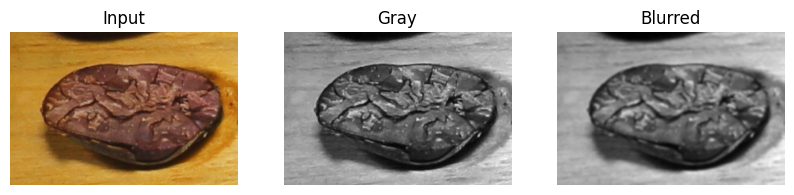

In [25]:
# define img
image2 = cv2.imread("/content/drive/MyDrive/Kakao/(4) train test validation/background/test/partly brown/CROP42_14.jpg")

# convert the image
image_RGB2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
img_gray2 = cv2.cvtColor(image_RGB2, cv2.COLOR_BGR2GRAY)
image_blurred = cv2.GaussianBlur(img_gray2, (7, 7), 0)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(image_RGB2, 'gray')
plt.axis('off')
plt.title("Input")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_gray2,'gray')
plt.axis('off')
plt.title("Gray")

fig.add_subplot(rows, columns, 3)
plt.imshow(image_blurred,'gray')
plt.axis('off')
plt.title("Blurred")

Text(0.5, 1.0, 'Inverse binary')

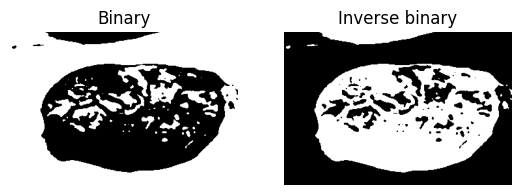

In [26]:
# Binarization with otsu thresholding
th_val, image_th = cv2.threshold(image_blurred,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
image_th_inv = cv2.bitwise_not(image_th) # make it into inverse binary

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(image_th,'gray')
plt.axis('off')
plt.title("Binary")

fig.add_subplot(rows, columns, 2)
plt.imshow(image_th_inv,'gray')
plt.axis('off')
plt.title("Inverse binary")

Text(0.5, 1.0, 'Cleaning')

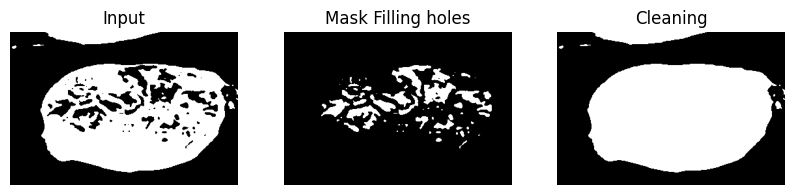

In [30]:
# Cleaning
im_floodfill2 = image_th_inv.copy()
h, w = image_th_inv.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill2, mask, (0,0), 255);
im_floodfill_inv2 = cv2.bitwise_not(im_floodfill2)
im_out2 = image_th_inv | im_floodfill_inv2
kernel = np.ones((4,4), np.uint8)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(image_th_inv,'gray')
plt.axis('off')
plt.title("Input")

fig.add_subplot(rows, columns, 2)
plt.imshow(im_floodfill_inv2,'gray')
plt.axis('off')
plt.title("Mask Filling holes")

fig.add_subplot(rows, columns, 3)
plt.imshow(im_out2,'gray')
plt.axis('off')
plt.title("Cleaning")

Text(0.5, 1.0, 'Dilation')

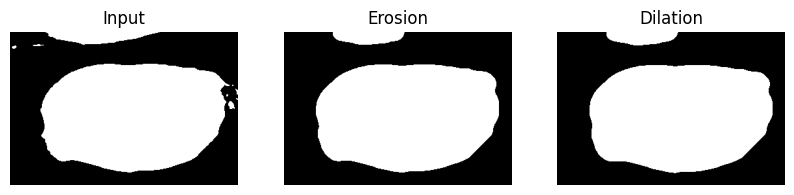

In [31]:
# Operasi morfologi opening dan closing
kernel_elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
kernel = np.ones((8, 8), np.uint8)
opening = cv2.morphologyEx(im_out2, cv2.MORPH_OPEN, kernel_elipse)

kernel_elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
kernel = np.ones((8, 8), np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_elipse)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(im_out2,'gray')
plt.axis('off')
plt.title("Input")

fig.add_subplot(rows, columns, 2)
plt.imshow(opening,'gray')
plt.axis('off')
plt.title("Erosion")

fig.add_subplot(rows, columns, 3)
plt.imshow(closing,'gray')
plt.axis('off')
plt.title("Dilation")

(-0.5, 349.5, 234.5, -0.5)

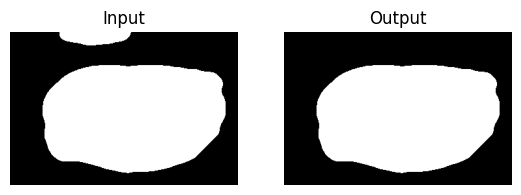

In [32]:
# remove undesirable element
closing = closing.astype('uint8')
analysis = cv2.connectedComponentsWithStats(closing, 4, cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

output_kakao2 = np.zeros(image_blurred.shape, dtype="uint8")
for i in range(1, totalLabels):
    sizes = values[i, cv2.CC_STAT_AREA]
    if (sizes > 15000) and (sizes < 100000): # atur size element yang mau di keep
        componentMask = (label_ids == i).astype("uint8") * 255
        output_kakao2 = cv2.bitwise_or(output_kakao2, componentMask)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(closing,'gray')
plt.axis('off')
plt.title("Input")

fig.add_subplot(rows, columns, 2)
plt.imshow(output_kakao2,'gray')
plt.title("Output")
plt.axis('off')

Masking the image

Text(0.5, 1.0, 'Segmented')

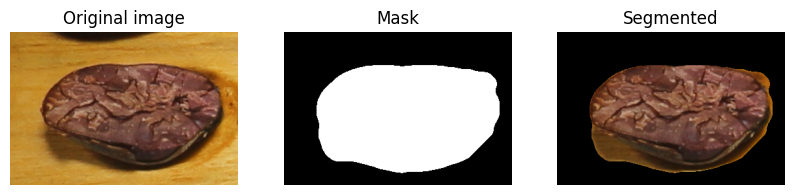

In [34]:
# Masking the sample
masked = cv2.bitwise_and(image2, image2, mask=output_kakao2)
masked_RGB = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)

# create image
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(image_RGB2,'gray')
plt.axis('off')
plt.title("Original image")

fig.add_subplot(rows, columns, 2)
plt.imshow(output_kakao2,'gray')
plt.axis('off')
plt.title("Mask")

fig.add_subplot(rows, columns, 3)
plt.imshow(masked_RGB,'gray')
plt.axis('off')
plt.title("Segmented")

In [36]:
# mengatur path untuk lokasi output hasil cropping
path = r"/content/drive/MyDrive/Latihan CNN"
os.chdir(path)

# save image
filename = 'Hasil.JPG' # jpg adalah format file (tidak boleh dihapus)
cv2.imwrite(filename, masked)

True

Running semua sampel citra

In [39]:
import glob
import os
import cv2
import skimage
from PIL import Image

def apply_otsu(folder, sigma=1.0):
    # Memilih semua file yang ada pada folder dengan format .JPG
    sumber_gambar = glob.glob(folder + "/*.jpg")

    # Membuat folder baru di dalam folder dengan nama folder/hasil_otsu apabila folder belum ada
    # apabila sudah ada tidak akan membuat folder baru
    PATH = folder + "/hasil_otsu"
    if not os.path.exists(PATH):
      os.makedirs(PATH)

    for gambar in sumber_gambar:
      pathname, extension = os.path.splitext(gambar)
      # Untuk mendapatkan nama file
      filename = pathname.split('/')
      print(f"Processing {gambar}")

      img = cv2.imread(gambar)
      # convert the image
      img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert the image to RGB
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale
      img_blurred = cv2.GaussianBlur(img_gray, (7, 7), 0)

      th_val, img_th = cv2.threshold(img_blurred,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
      img_th_inv = cv2.bitwise_not(img_th)

      # Cleaning
      im_floodfill = img_th_inv.copy()
      h, w = img_th_inv.shape[:2]
      mask = np.zeros((h+2, w+2), np.uint8)
      cv2.floodFill(im_floodfill, mask, (0,0), 255);
      im_floodfill_inv = cv2.bitwise_not(im_floodfill)
      im_out = img_th_inv | im_floodfill_inv
      kernel = np.ones((4,4), np.uint8)

      # Operasi morfologi opening dan closing
      kernel_elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
      kernel = np.ones((8, 8), np.uint8)
      opening = cv2.morphologyEx(im_out, cv2.MORPH_OPEN, kernel_elipse)

      kernel_elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
      kernel = np.ones((8, 8), np.uint8)
      closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_elipse)

      # Connected component
      closing = closing.astype('uint8')
      analysis = cv2.connectedComponentsWithStats(closing, 4, cv2.CV_32S)
      (totalLabels, label_ids, values, centroid) = analysis

      output_kakao = np.zeros(img_blurred.shape, dtype="uint8")
      for i in range(1, totalLabels):
          sizes = values[i, cv2.CC_STAT_AREA]
          if (sizes < 100000) and (sizes > 15000):
              componentMask = (label_ids == i).astype("uint8") * 255
              output_kakao = cv2.bitwise_or(output_kakao, componentMask)

      # masking
      masked = cv2.bitwise_and(img, img, mask=output_kakao)
      img_rgb = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)

      tmp = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
      _, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
      b, g, r = cv2.split(img_rgb)
      rgba = [b, g, r, alpha]
      img_transparent = cv2.merge(rgba, 4)

      image = Image.fromarray(img_rgb) # n x m x 3

      image.save(PATH + "/" + filename[-1] + "_otsu" + ".JPG", "PNG")

In [40]:
apply_otsu("/content/drive/MyDrive/Latihan CNN/Segmentasi gambar")

Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP1_59.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP1_58.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP1_49.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP1_45.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_43.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_56.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_32.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_49.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_31.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_78.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_23.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_73.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP

contoh biji kopi

Text(0.5, 1.0, 'Binarized Image')

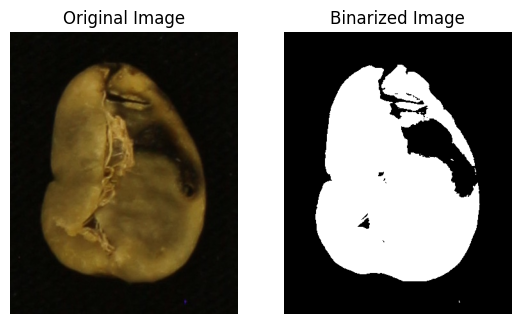

In [ ]:
# Read the image
image4 = skimage.io.imread("/content/drive/MyDrive/Kakao/Latihan CNN/Kopi.jpg")
image_gray2 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

# Thresh binary
th_val, image_th2 = cv2.threshold(image_gray2,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(image4, 'gray')
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(image_th2,'gray')
plt.axis('off')
plt.title("Binarized Image")

Text(0.5, 1.0, 'After Cleaning')

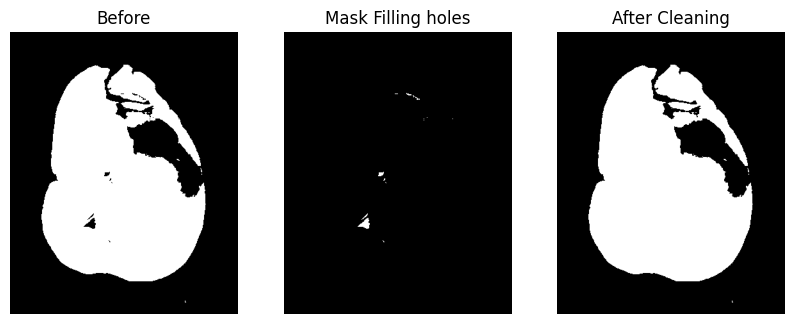

In [ ]:
# Cleaning
im_floodfill2 = image_th2.copy()
h, w = image_th2.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill2, mask, (0,0), 255);
im_floodfill_inv3 = cv2.bitwise_not(im_floodfill2)
im_out4 = image_th2 | im_floodfill_inv3
kernel = np.ones((4,4), np.uint8)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(image_th2,'gray')
plt.axis('off')
plt.title("Before")

fig.add_subplot(rows, columns, 2)
plt.imshow(im_floodfill_inv3,'gray')
plt.axis('off')
plt.title("Mask Filling holes")

fig.add_subplot(rows, columns, 3)
plt.imshow(im_out4,'gray')
plt.axis('off')
plt.title("After Cleaning")

### Multilevel thresholding

Make a mask

In [41]:
import os
from PIL import Image
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray
import pandas as pd

Text(0.5, 1.0, 'Binarized Image')

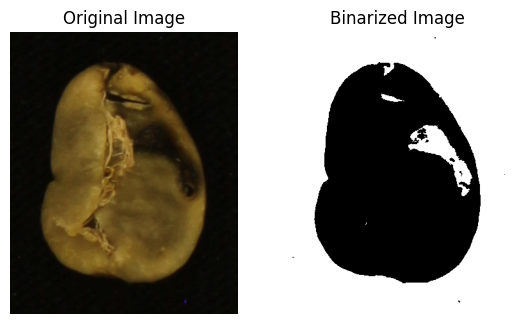

In [43]:
# define img
image3 = skimage.io.imread("/content/drive/MyDrive/Latihan CNN/Kopi.jpg")

binary = skimage.color.rgb2gray(image3)<0.1

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(image3, 'gray')
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(binary,'gray')
plt.axis('off')
plt.title("Binarized Image")

Text(0.5, 1.0, 'inverted binary Image')

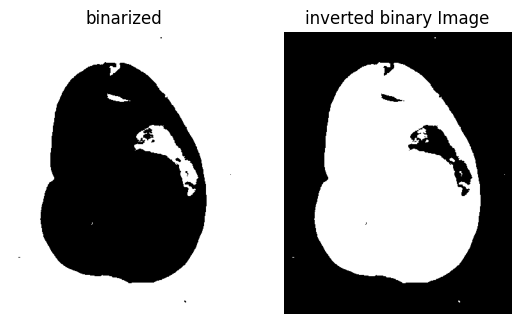

In [44]:
# Invert the binary image
inverted_binary_image = 1 - binary
mask_uint8 = inverted_binary_image.astype('uint8')

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(binary, 'gray')
plt.axis('off')
plt.title("binarized")

fig.add_subplot(rows, columns, 2)
plt.imshow(inverted_binary_image,'gray')
plt.axis('off')
plt.title("inverted binary Image")

Text(0.5, 1.0, 'Cleaning')

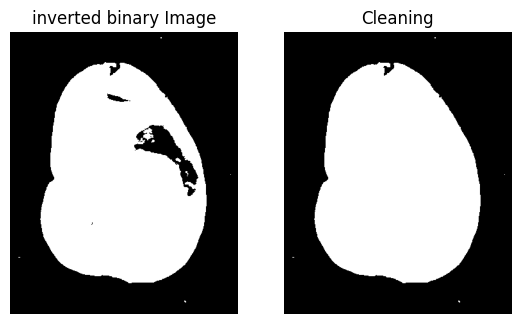

In [45]:
# Cleaning
im_floodfill3 = mask_uint8.copy()
h, w = mask_uint8.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill3, mask, (0,0), 255);
im_floodfill_inv3 = cv2.bitwise_not(im_floodfill3)
im_out3 = mask_uint8 | im_floodfill_inv3
kernel = np.ones((4,4), np.uint8)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(inverted_binary_image, 'gray')
plt.axis('off')
plt.title("inverted binary Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(im_out3,'gray')
plt.axis('off')
plt.title("Cleaning")

Text(0.5, 1.0, 'Closing')

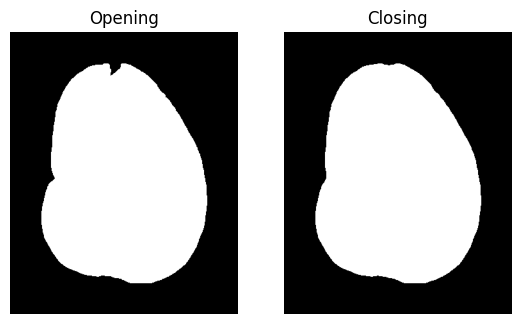

In [46]:
# operasi morfologi opening dan closing
kernel_elipse_opening = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
kernel_elipse_closing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35, 35))

opening2 = cv2.morphologyEx(im_out3, cv2.MORPH_OPEN, kernel_elipse_opening)
closing2 = cv2.morphologyEx(opening2, cv2.MORPH_CLOSE, kernel_elipse_closing)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(opening2, 'gray')
plt.axis('off')
plt.title("Opening")

fig.add_subplot(rows, columns, 2)
plt.imshow(closing2,'gray')
plt.axis('off')
plt.title("Closing")

Masking the image

Text(0.5, 1.0, 'Segmented image')

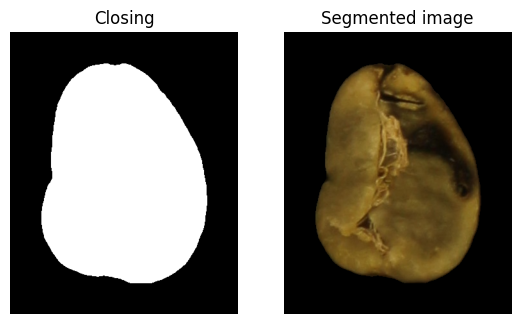

In [47]:
# Masking the sample
masked2 = cv2.bitwise_and(image3, image3, mask=closing2)
masked_RGB2 = cv2.cvtColor(masked2, cv2.COLOR_BGR2RGB)

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(closing2, 'gray')
plt.axis('off')
plt.title("Closing")

fig.add_subplot(rows, columns, 2)
plt.imshow(masked2,'gray')
plt.axis('off')
plt.title("Segmented image")

In [ ]:
# mengatur path untuk lokasi output hasil cropping
path = r"/content/drive/MyDrive/Kakao/Latihan CNN"
os.chdir(path)

# save image
filename = 'Masked RGB.JPG' # jpg adalah format file (tidak boleh dihapus)
cv2.imwrite(filename, masked_RGB2)

Running semua sampel citra

In [48]:
import glob
import os
import cv2
import skimage
from PIL import Image
from skimage.filters import unsharp_mask
from skimage.filters import (threshold_otsu, threshold_triangle, threshold_niblack, threshold_sauvola)
from skimage import img_as_ubyte

def apply_multilevel_otsu(folder, sigma=1.0):
    sumber_gambar = glob.glob(folder + "/*.jpg") # FORMAT GAMBAR DI FOLDER
    #sumber_gambar = glob.glob(folder + "/*.JPG") # FORMAT GAMBAR DI FOLDER

    # Membuat folder baru di dalam folder dengan nama folder/hasil_otsu apabila folder belum ada
    # apabila sudah ada tidak akan membuat folder baru
    PATH = folder + "/hasil_multilevel_otsu"
    if not os.path.exists(PATH):
      os.makedirs(PATH)

    for gambar in sumber_gambar:
      pathname, extension = os.path.splitext(gambar)
      # Untuk mendapatkan nama file
      filename = pathname.split('/')
      print(f"Processing {gambar}")

      image3 = cv2.imread(gambar)

      # turn to binary image
      binary = skimage.color.rgb2gray(image3)<0.1

      # Invert the binary image
      inverted_binary_image = 1 - binary
      mask_uint8 = inverted_binary_image.astype('uint8')

      # Cleaning
      im_floodfill3 = mask_uint8.copy()
      h, w = mask_uint8.shape[:2]
      mask = np.zeros((h+2, w+2), np.uint8)
      cv2.floodFill(im_floodfill3, mask, (0,0), 255);
      im_floodfill_inv3 = cv2.bitwise_not(im_floodfill3)
      im_out3 = mask_uint8 | im_floodfill_inv3
      kernel = np.ones((4,4), np.uint8)

      # operasi morfologi opening dan closing
      kernel_elipse_opening = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
      kernel_elipse_closing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35, 35))

      opening2 = cv2.morphologyEx(im_out3, cv2.MORPH_OPEN, kernel_elipse_opening)
      closing2 = cv2.morphologyEx(opening2, cv2.MORPH_CLOSE, kernel_elipse_closing)

      # Masking the sample
      masked2 = cv2.bitwise_and(image3, image3, mask=closing2)
      masked_RGB2 = cv2.cvtColor(masked2, cv2.COLOR_BGR2RGB)

      image = Image.fromarray(masked_RGB2) # untuk citra dengan background hitam

      image.save(PATH + "/" + filename[-1] + "_otsu" + ".JPG", "PNG")

In [49]:
apply_multilevel_otsu("/content/drive/MyDrive/Latihan CNN/Segmentasi gambar")

Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP1_59.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP1_58.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP1_49.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP1_45.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_43.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_56.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_32.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_49.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_31.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_78.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_23.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP10_73.jpg
Processing /content/drive/MyDrive/Latihan CNN/Segmentasi gambar/CROP

contoh gambar biji kakao

Text(0.5, 1.0, 'Binarized Image')

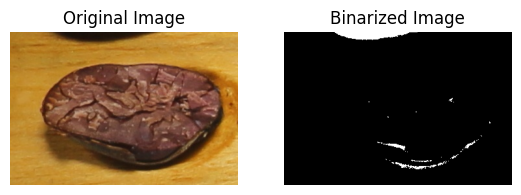

In [ ]:
# define img
image3 = skimage.io.imread("/content/drive/MyDrive/Kakao/(4) train test validation/background/test/partly brown/CROP42_14.jpg")
binary = skimage.color.rgb2gray(image3)<0.1

# create figure
fig = plt.figure(figsize=(10, 5))
rows = 1
columns = 3

# showing image
fig.add_subplot(rows, columns, 1)
plt.imshow(image3, 'gray')
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(binary,'gray')
plt.axis('off')
plt.title("Binarized Image")